In [89]:
import tensorflow as tf

In [80]:
import os
import shutil
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.image import imread
from sklearn.metrics import confusion_matrix
from PIL import Image
import PIL
import requests
import itertools
from numpy import asarray

In [81]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image

In [4]:
def teachable_machine_classification ()
os.chdir('/Users/francois/Desktop/YNOV/MJDL/DLENV')

In [5]:
pre_trained_model = tf.keras.models.load_model ('mobile5')

In [6]:
labels = pd.read_csv("Mobilenet_transfer_acc.csv").iloc[0:120,0].values

In [7]:
print ("lien html vers l'image d'une race de chien à identifier :")

lien html vers l'image d'une race de chien à identifier :


In [85]:
url=input()

 https://images.dog.ceo/breeds/terrier-bedlington/n02093647_3414.jpg


In [86]:
if url == "" :
    image = Image.open ("IMG_8155.jpeg").resize((224,224),PIL.Image.ANTIALIAS)
else :
    image = Image.open (requests.get(url,stream=True).raw)

In [87]:
img=image.resize((224,224),PIL.Image.ANTIALIAS)

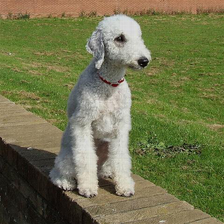

In [88]:
img

In [72]:
img_array = asarray(img)

In [73]:
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
pred_image = tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [74]:
predictions = pre_trained_model.predict(pred_image)

In [75]:
tf_pred_dataframe = pd.DataFrame(predictions).T
tf_pred_dataframe ['Labels'] = labels
tf_pred_dataframe.columns = ["Proba","Labels"]
probas = tf_pred_dataframe.sort_values("Proba",ascending=False).head(3).reset_index(drop=True,inplace=False)

In [76]:
print (image,probas)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F9CB18A2400>       Proba               Labels
0  0.241475             keeshond
1  0.200738                cairn
2  0.113801  miniature_schnauzer
